# import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [3]:
# read dataset, features include only after PCA though other features available in the dataset : a divider column after PCA 

In [4]:
data_folder = './acr-data-for-analysis/food-subgroups/'
df = pd.read_csv( data_folder + 'regression_variables_after_pca_saved_for_factor_transformations.csv') # import the CSV as a pandas dataframe
df = df.drop(['Unnamed: 23'], axis=1)
# show the first five rows
df.shape
df.head(5) 

,Fruits and juices baby food,"Nuts, Seeds, and Soy Products",Oils,Dried fruits,a_sample_food_code,acr,participant_id,participant_age,Added Sugars/Sugars and sweets,Alcoholic beverages,"Citrus fruits, juices",Dark-green vegetables,Fruit juices and nectars excluding citrus,"Meat, Poultry and Eggs subgroup","Milk desserts, sauces, gravies",Milks and milk drinks,Nonalcoholic beverages,Other fruits,Other vegetables,Protein,Red and orange vegetables,Refined grains,Seafood,Solid Fats,Starchy vegetables,"Water, noncarbonated",Whole grains,gender,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
0,0.0,0.0,0.0,0.0,59579313.78,0.0,84237,3,6.56,0.0,0.0,0.00,232.5,54.06,0.0,183.00,0.0,69.19,0.00,0.0,0.0,40.00,0.0,0.0,110.00,225.0,116.75,1,0,0,0,157.888889,5.135556,182.333333,21.611111,7.977778,1.533333,6.086667,2.321889,2.073000,1.152111,13.333333,93.111111,102.888889,18.333333,183.666667,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,54162411.11,0.0,85282,3,0.00,0.0,0.0,0.00,0.0,0.00,0.0,106.75,108.5,149.00,124.31,40.0,0.0,18.00,0.0,21.0,0.00,507.0,21.00,1,0,0,0,58.277778,2.000000,122.666667,7.951111,3.967778,0.688889,2.174444,0.723611,0.662111,0.600500,19.777778,76.000000,53.055556,7.500000,89.055556,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,315.0,0.0,0.0,0.0,54513819.83,0.0,85329,3,0.00,0.0,131.0,90.56,325.5,128.00,29.5,156.31,0.0,42.34,0.00,0.0,0.0,48.50,0.0,0.0,110.00,172.5,120.18,1,0,0,0,167.687500,4.297708,231.270833,23.332917,9.479375,1.716667,6.906042,1.834167,2.743021,2.222562,11.791667,88.125000,96.854167,20.125000,221.104167,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,56333783.25,0.0,85809,3,0.00,0.0,0.0,0.00,0.0,22.50,0.0,164.70,0.0,66.00,79.00,0.0,0.0,33.75,0.0,0.0,10.83,180.0,49.53,2,0,0,0,111.387500,4.124375,232.079167,11.359250,4.543250,0.906250,5.673375,2.087625,1.912962,1.263713,14.087500,68.900000,78.362500,11.212500,119.487500,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,63708135.00,0.0,86527,3,29.75,0.0,0.0,0.00,170.0,0.00,0.0,101.66,0.0,93.17,0.00,0.0,0.0,0.00,0.0,0.0,0.00,200.0,151.47,1,0,0,0,126.777778,4.828611,219.300000,18.468889,8.399722,1.169444,4.738611,1.994917,1.329944,0.769722,16.500000,69.083333,83.750000,15.783333,187.166667,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
original_acr = df['acr']
list(df['acr'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.25,
 3.69,
 5.77,
 6.43,
 6.8,
 6.92,
 7.06,
 7.1,
 7.14,
 7.31,
 7.36,
 8.18,
 8.31,
 8.67,
 8.75,
 8.95,
 9.01,
 9.05,
 9.12,
 9.52,
 9.73,
 9.77,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.24,
 10.43,
 10.55,
 10.62,
 10.63,
 10.68,
 11.27,
 11.28,
 11.35,
 11.37,
 11.47,
 11.62,
 11.64,
 11.7,
 11.92,
 12.35,
 12.47,
 12.67,
 12.87,
 13.21,
 13.33,
 13.47,
 13.6,
 13.64,
 14.05,
 14.05,
 14.08,
 14.12,
 14.48,
 14.71,
 15.0,
 16.39,
 16.67,
 16.9,
 17.08,
 17.56,
 17.56,
 18.81,
 18.89,
 20.0,
 20.95,
 21.0,
 21.11,
 21.43,
 21.5,
 21.58,
 21.82,
 22.86,
 23.33,
 25.79,
 26.19,
 26.86,
 27.22,
 27.39,
 27.44,
 27.5,
 27.54,
 27.63,
 27.89,
 28.44,
 28.5,
 28.71,
 28.89,
 29.0,
 29.05,
 29.61,
 31.3,
 33.42,
 33.44,
 35.43,
 35.91,
 39.09,
 41.67,
 43.93,
 46.57,
 48.93,
 52.19,
 56.09,
 56.14,


In [6]:
# missing values were handled in other previous steps
# missing values were replaced with zeros as zero might mean the user did not take that food group/subgroup on that day

In [7]:
# Create categories for the severity of ACR

In [8]:
y = []
for aVal in df['acr']:
    if aVal < 30:
        #y.append('normal-mild')
        y.append(0)
    elif aVal >= 300:
        #y.append('severe')
        y.append(3)
    elif aVal < 150:
        #y.append('mild-moderate-low')
        y.append(1)
    elif aVal >= 150:        
        #y.append('mild-moderate-high')
        y.append(2)
        
df['acr_category'] = y
df['acr_category']
len(y), y[:10]

(7697, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
yy = []
for aVal in df['acr']:
    if aVal < 30:
        #yy.append('normal-mild')
        yy.append(0)
    elif aVal >= 300:
        #yy.append('severe')
        yy.append(2)
    else:
        #yy.append('mild-moderate')
        yy.append(1)
        
        
df['acr_category_2'] = yy
df['acr_category_2']
len(yy), yy[7000:]

#st = df.apply(LabelEncoder().fit_transform)
#st.tail()

(7697,
 [1,
  1,
  1,
  1,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [10]:
df.columns

Index(['Fruits and juices baby food', 'Nuts, Seeds, and Soy Products', 'Oils',
       'Dried fruits', 'a_sample_food_code', 'acr', 'participant_id',
       'participant_age', 'Added Sugars/Sugars and sweets',
       'Alcoholic beverages', 'Citrus fruits, juices', 'Dark-green vegetables',
       'Fruit juices and nectars excluding citrus',
       'Meat, Poultry and Eggs subgroup', 'Milk desserts, sauces, gravies',
       'Milks and milk drinks ', 'Nonalcoholic beverages', 'Other fruits',
       'Other vegetables', 'Protein', 'Red and orange vegetables',
       'Refined grains', 'Seafood', 'Solid Fats', 'Starchy vegetables',
       'Water, noncarbonated', 'Whole grains', 'gender', 'kidney_failed',
       'systolic_pressure', 'diastolic_pressure', 'calorie', 'protein',
       'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat', 'saturated_fat',
       'mono_fat', 'poly_fat', 'cholesterol', 'calcium', 'phosphorous',
       'magnesium', 'potassium', 'alcohol', 'albumin_urine_mu_g',
       'al

In [11]:
# convert str values to int using the scikit-learn encoder : acr_category

In [12]:
from sklearn.preprocessing import LabelEncoder
#st_b = df.apply(LabelEncoder().fit_transform)
#st_b.head()

In [14]:
#st_b.columns

In [15]:
#st_b['acr_category'][:10]

In [16]:
#st_b.columns

In [17]:
# Take only the important columns

In [18]:
st = df[
    
    [
        'Fruits and juices baby food', 'Nuts, Seeds, and Soy Products', 'Oils',
        'Dried fruits', 
        'Added Sugars/Sugars and sweets',
       'Alcoholic beverages', 'Citrus fruits, juices', 'Dark-green vegetables',
       'Fruit juices and nectars excluding citrus',
       'Meat, Poultry and Eggs subgroup', 'Milk desserts, sauces, gravies',
       'Milks and milk drinks ', 'Nonalcoholic beverages', 'Other fruits',
       'Other vegetables', 'Protein', 'Red and orange vegetables',
       'Refined grains', 'Seafood',      
       'Solid Fats',
       'Starchy vegetables', 'Water, noncarbonated', 'Whole grains',
       'acr', 'acr_category', 'acr_category_2'
    
    ]
]

In [19]:
# normalize dataframe (st) data to st_norm dataframe
# However, keep acr_category and acr value as is i.e. acr columns data is preserved under acr_preserved column

In [20]:
acr_preserved = st['acr']
acr_category_preserved = st['acr_category']
acr_category_preserved_2 = st['acr_category_2']

st_norm = (st - st.mean())/ (st.max() - st.min())

st_norm['acr_category'] = acr_category_preserved #st_b['acr_category']
st_norm['acr_category_2'] = acr_category_preserved_2 #st_b['acr_category']
st_norm['acr_preserved'] = acr_preserved

#no need, acr is there
#st['acr_preserved'] = acr_preserved

st_norm['acr_category'][:5]
st_norm['acr_category'].head(5), st_norm['acr_preserved']

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: acr_category, dtype: int64, 0          0.00
 1          0.00
 2          0.00
 3          0.00
 4          0.00
 5          0.00
 6          0.00
 7          0.00
 8          0.00
 9          0.00
          ...   
 7687     652.30
 7688     729.80
 7689     770.59
 7690     776.40
 7691    1088.74
 7692    1489.55
 7693    2190.38
 7694    2621.43
 7695    3685.39
 7696    4929.58
 Name: acr_preserved, Length: 7697, dtype: float64)

In [21]:
#st.tail(3), st_norm.tail(3), df.tail(3)

In [22]:
# set palette : colorblind friendly

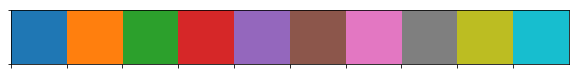

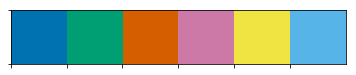

In [23]:
# deep, muted, pastel, bright, dark, and colorblind.
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.palplot(current_palette)


In [24]:
# Heatmap with values as is

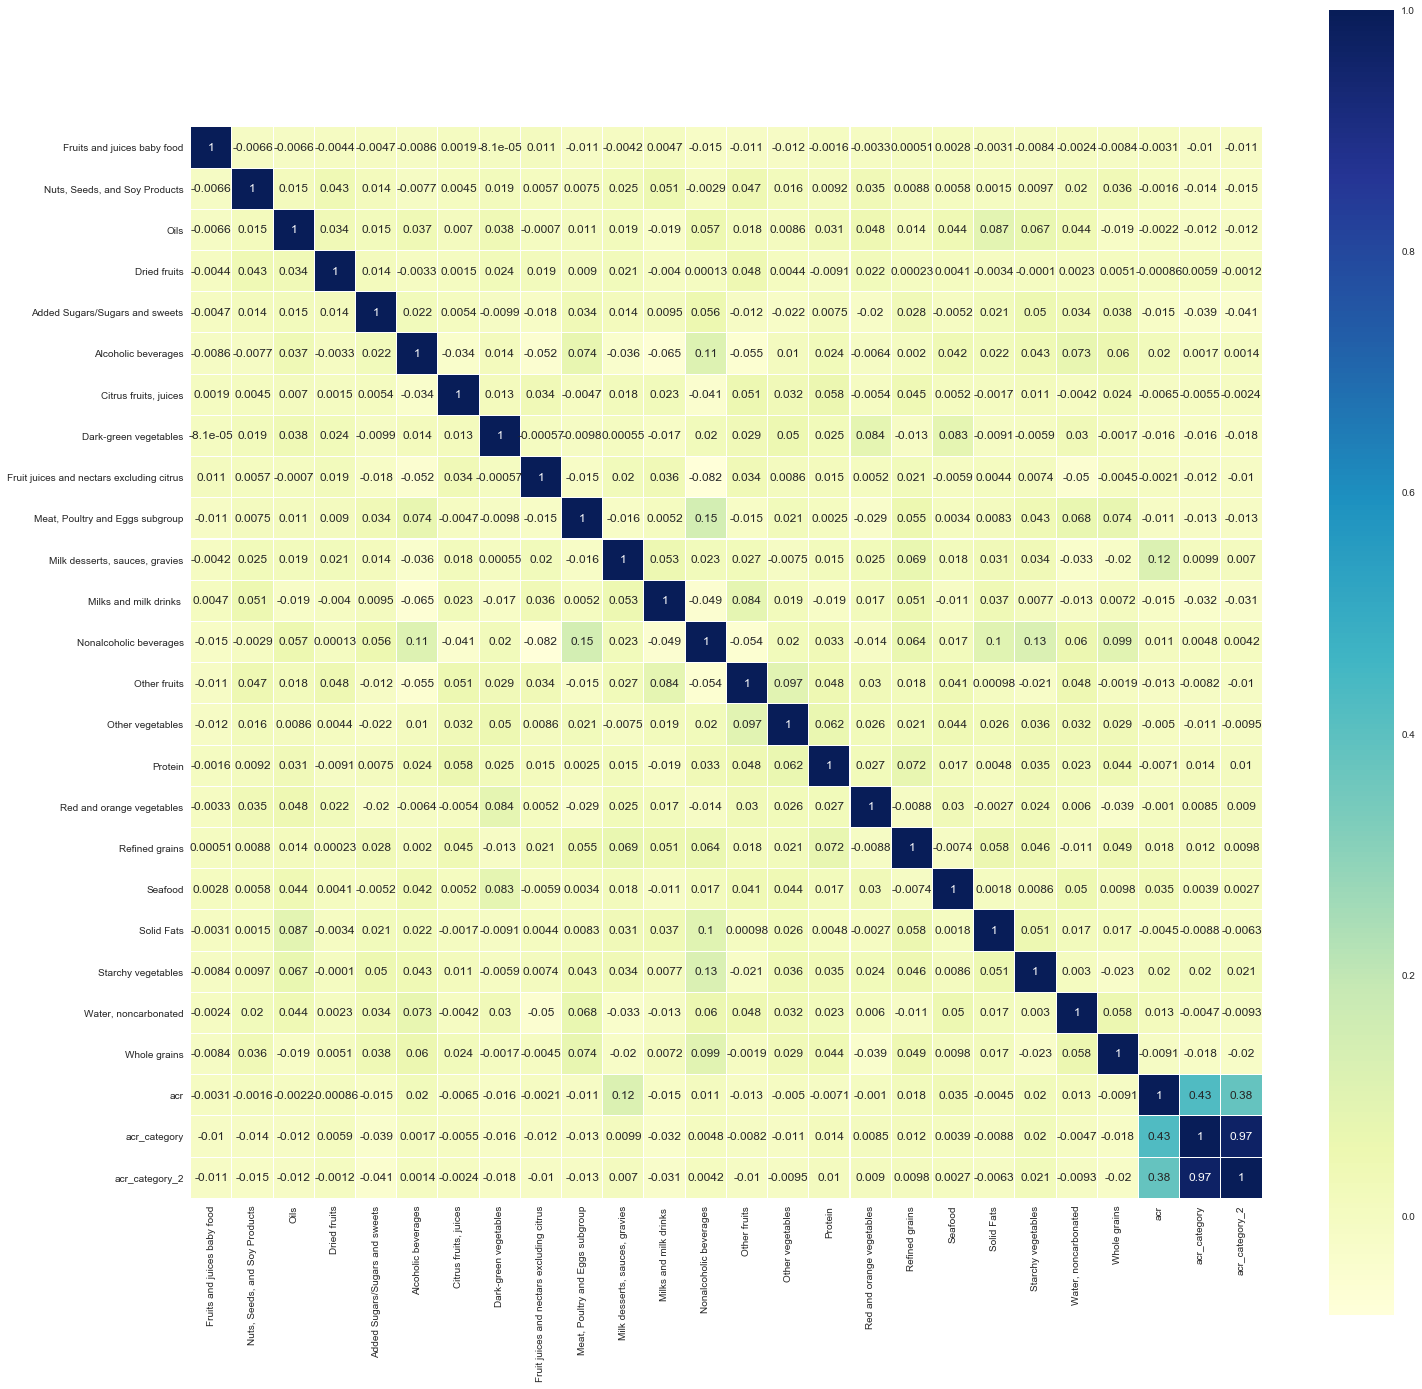

In [25]:
sns.set(color_codes=True)
plt.figure(figsize=(24, 24))
sns.heatmap(st.astype(float).corr(), 
            linewidths=0.05, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu",
           fmt='.2g')
plt.show()

# heatmap with normalized values

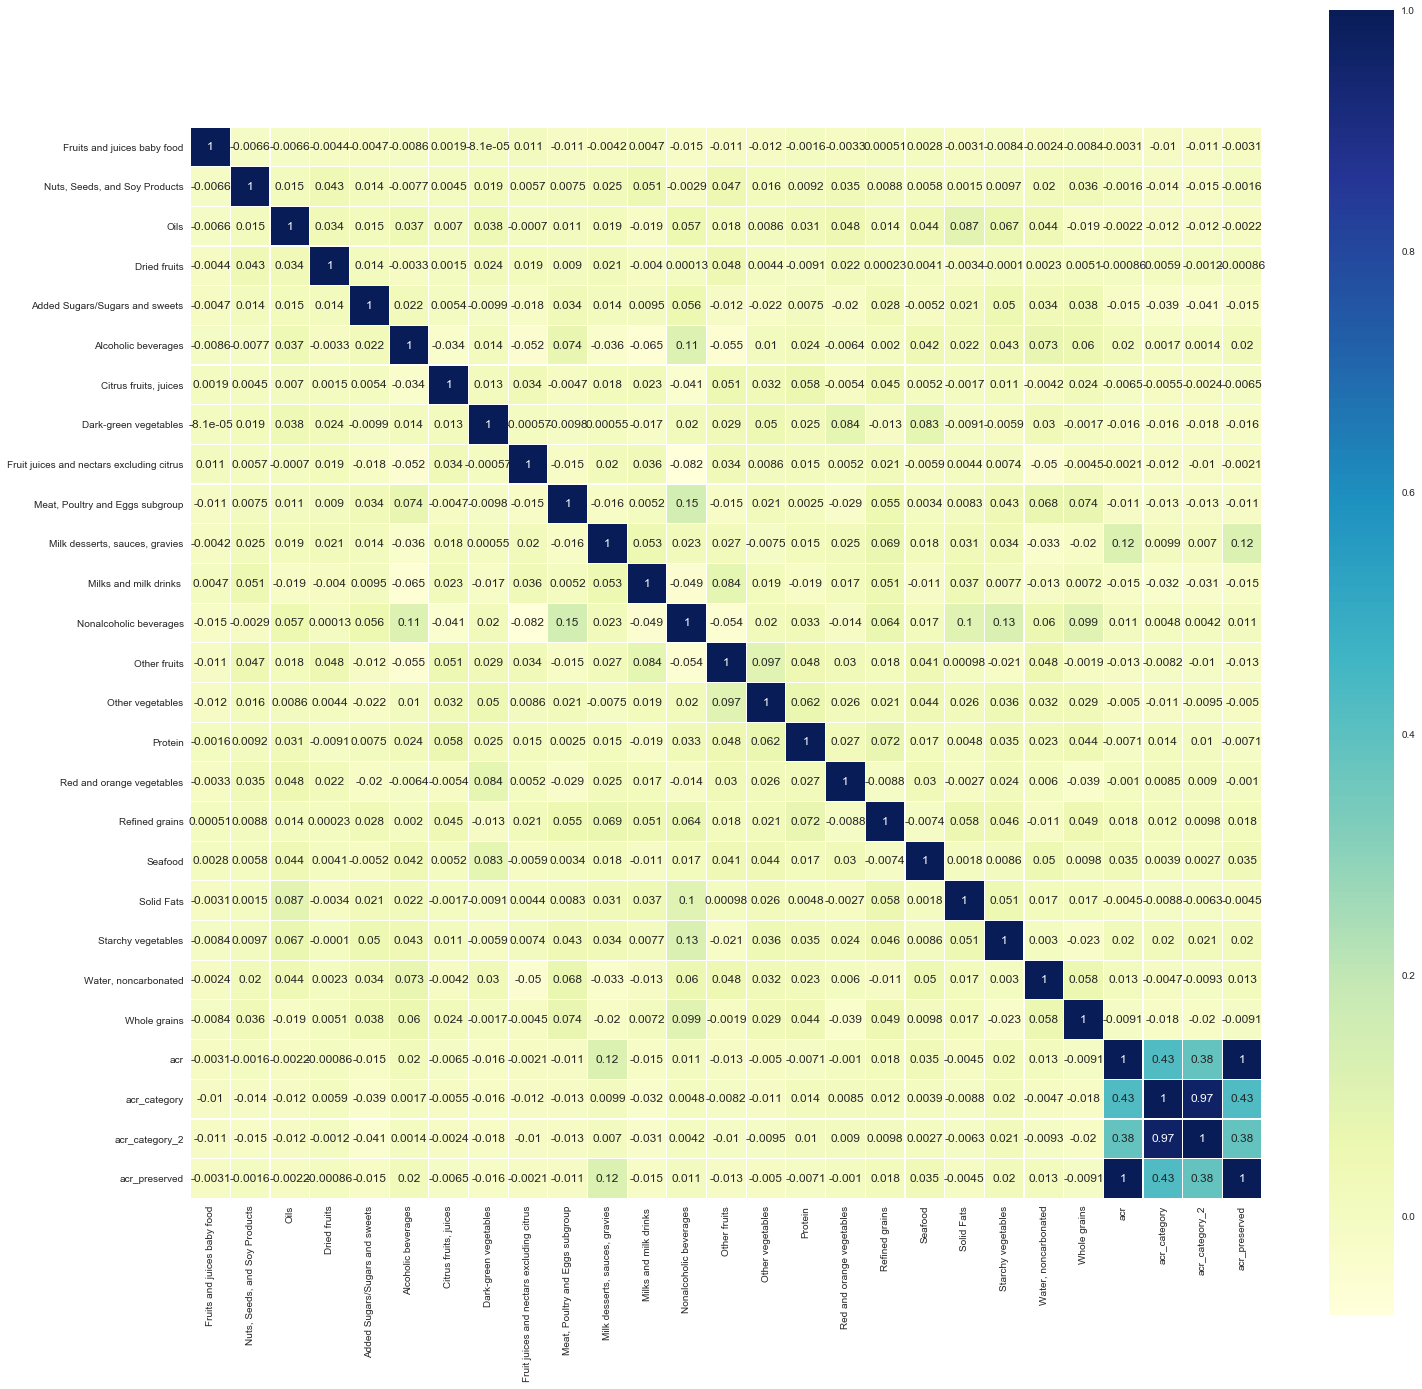

In [26]:
sns.set(color_codes=True)
plt.figure(figsize=(24, 24))
sns.heatmap(st_norm.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu")
plt.show()

In [27]:
#facet grid

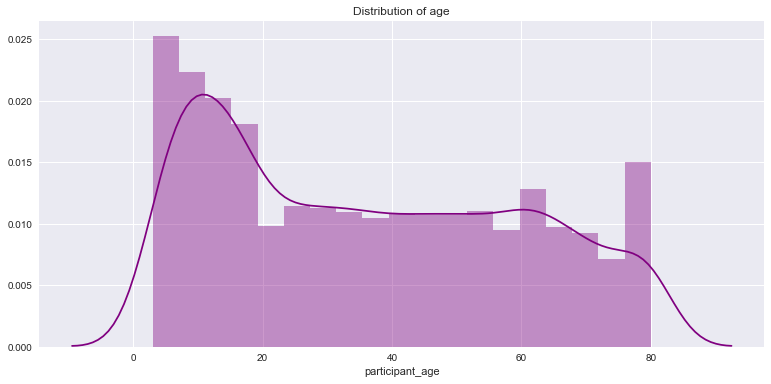

In [28]:
plt.figure(figsize=(13,6))
plt.title("Distribution of age")
ax = sns.distplot(df["participant_age"], color = 'purple')

In [29]:
# do not give any useful outcome: commenting out
#sns.barplot(x="acr_category",   hue='Alcoholic beverages', data = st , palette='pastel');
# hue = 'participant_age', kind="strip",
#plt.show()
#g = sns.catplot(x="Alcoholic beverages", y="acr_category", hue="kind", data=exercise, kind="violin")

In [30]:
#palette = dict( (st['acr'] < 30 == "g"), (st['acr'] > 30) == "g")

In [31]:
sns.set_palette('muted')

# Not important: later sections will address this
#sns.lmplot(x="Water, noncarbonated", y="acr", hue="acr_category", data=st_norm,  size = 7);
#ax.set_title('Water, noncarbonated');
#plt.show()
# palette=dict(yes="r", no="g"),

In [32]:
df.columns, st.columns, st_norm.columns

(Index(['Fruits and juices baby food', 'Nuts, Seeds, and Soy Products', 'Oils',
        'Dried fruits', 'a_sample_food_code', 'acr', 'participant_id',
        'participant_age', 'Added Sugars/Sugars and sweets',
        'Alcoholic beverages', 'Citrus fruits, juices', 'Dark-green vegetables',
        'Fruit juices and nectars excluding citrus',
        'Meat, Poultry and Eggs subgroup', 'Milk desserts, sauces, gravies',
        'Milks and milk drinks ', 'Nonalcoholic beverages', 'Other fruits',
        'Other vegetables', 'Protein', 'Red and orange vegetables',
        'Refined grains', 'Seafood', 'Solid Fats', 'Starchy vegetables',
        'Water, noncarbonated', 'Whole grains', 'gender', 'kidney_failed',
        'systolic_pressure', 'diastolic_pressure', 'calorie', 'protein',
        'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat', 'saturated_fat',
        'mono_fat', 'poly_fat', 'cholesterol', 'calcium', 'phosphorous',
        'magnesium', 'potassium', 'alcohol', 'albumin_urine_mu_

Fruits and juices baby food


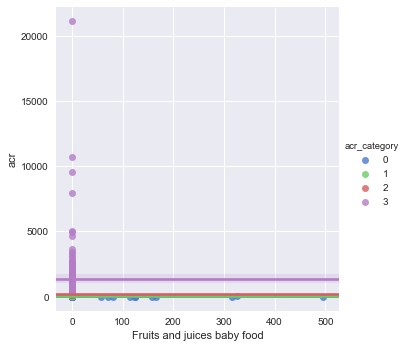

Nuts, Seeds, and Soy Products


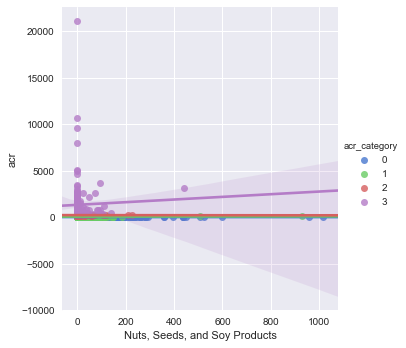

Oils


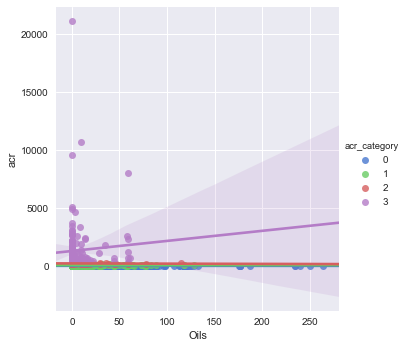

Dried fruits


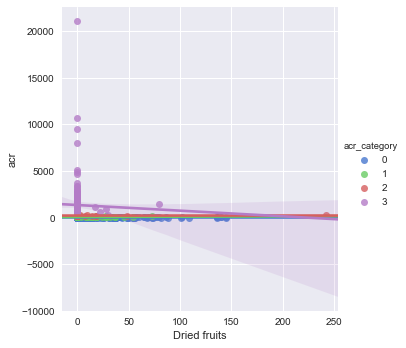

Added Sugars/Sugars and sweets


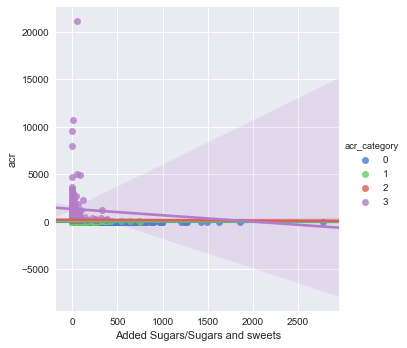

Alcoholic beverages


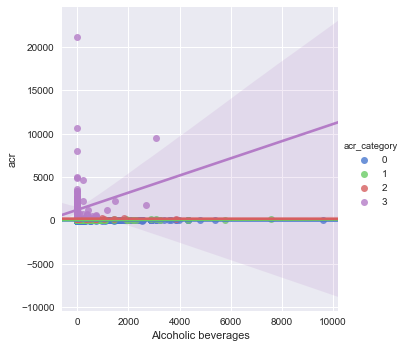

Citrus fruits, juices


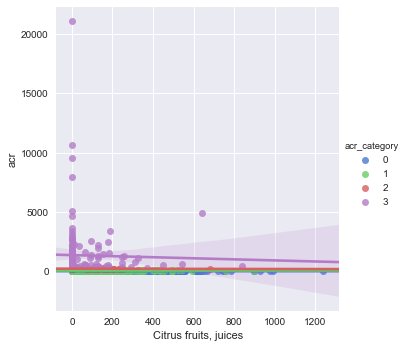

Dark-green vegetables


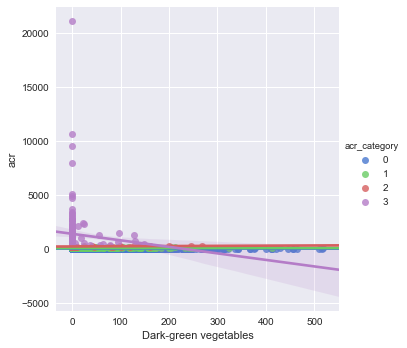

Fruit juices and nectars excluding citrus


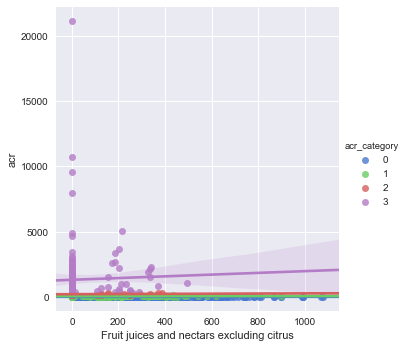

Meat, Poultry and Eggs subgroup


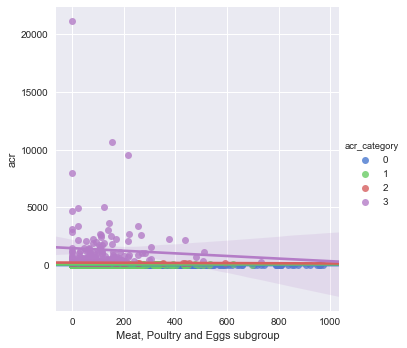

Milk desserts, sauces, gravies


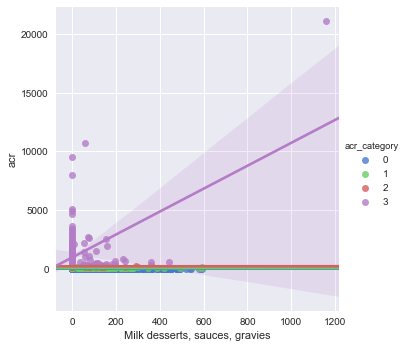

Milks and milk drinks 


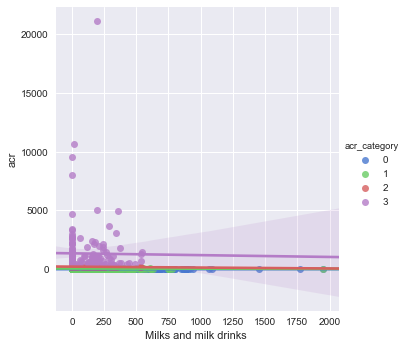

Nonalcoholic beverages


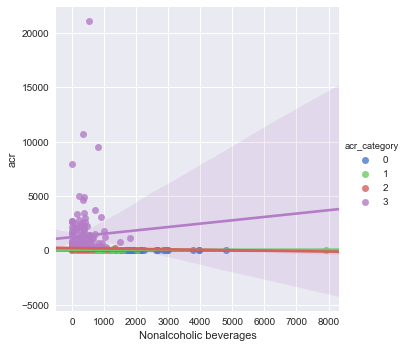

Other fruits


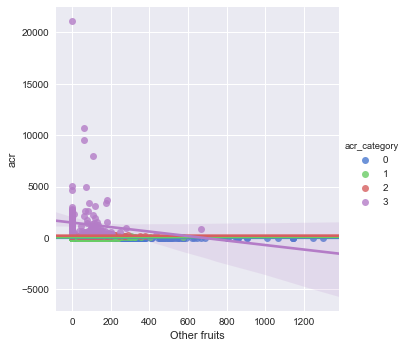

Other vegetables


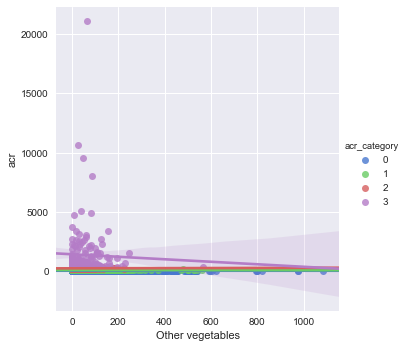

Protein


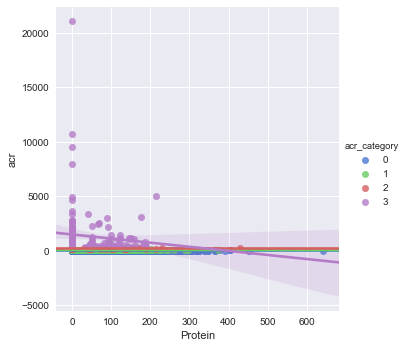

Red and orange vegetables


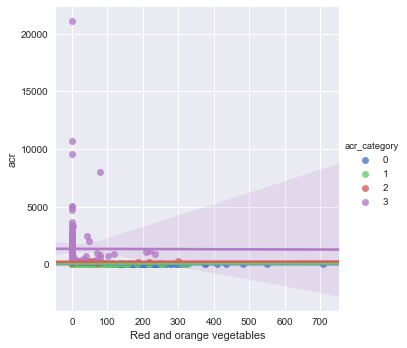

Refined grains


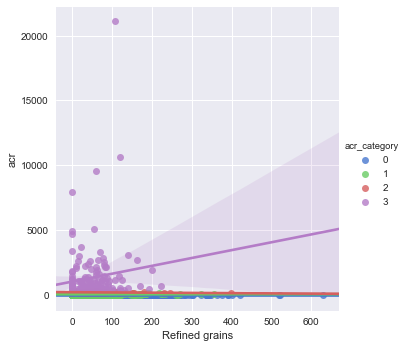

Seafood


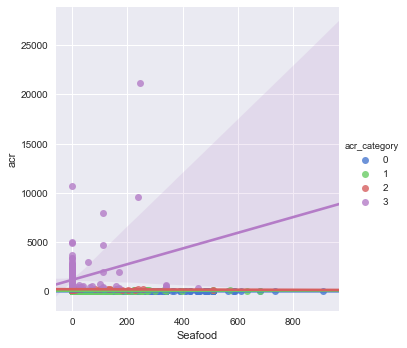

Solid Fats


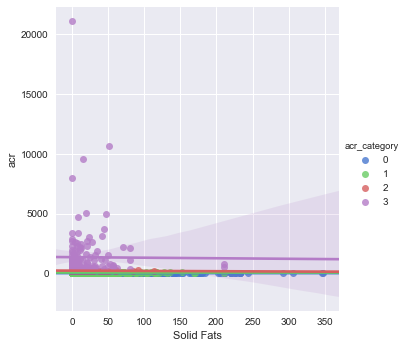

Starchy vegetables


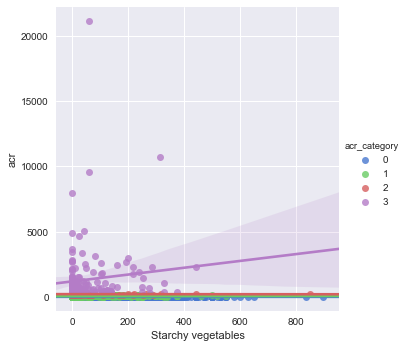

Water, noncarbonated


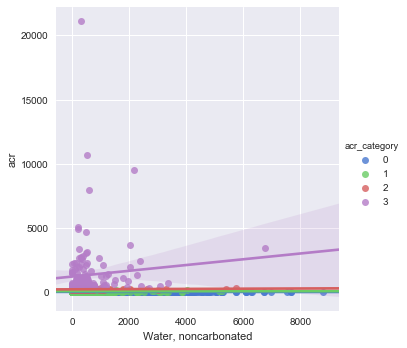

Whole grains


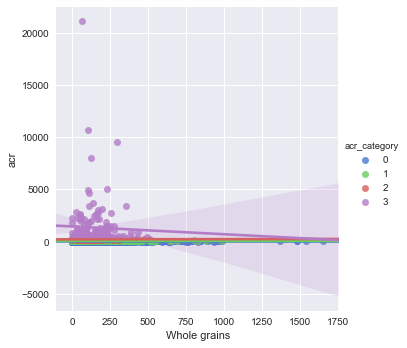

acr


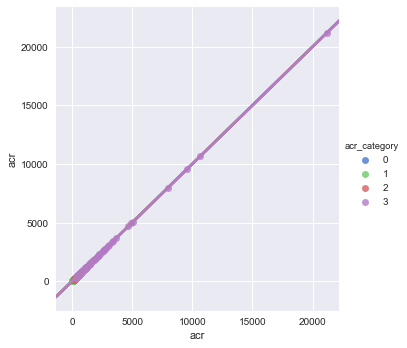

acr_category


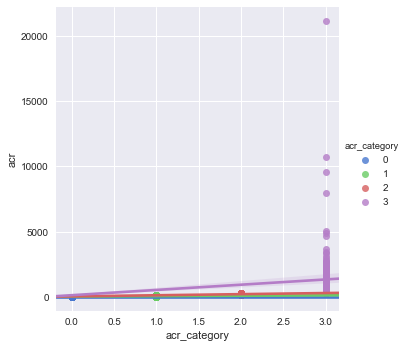

acr_category_2


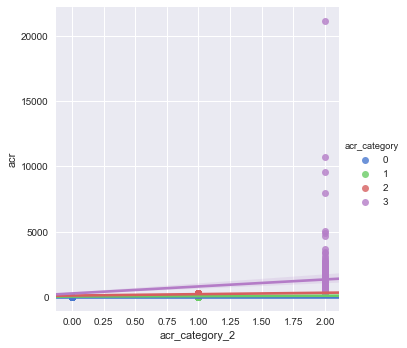

In [33]:
for subgroup in st.columns:
    print(subgroup)
    sns.lmplot(x=subgroup, y="acr", hue="acr_category", data=st,  size = 5);
    ax.set_title(subgroup);
    plt.show()
    
#ref: https://seaborn.pydata.org/generated/seaborn.lmplot.html    

Fruits and juices baby food


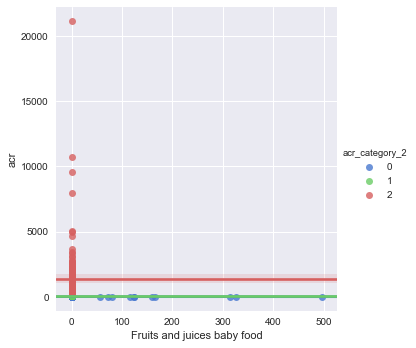

Nuts, Seeds, and Soy Products


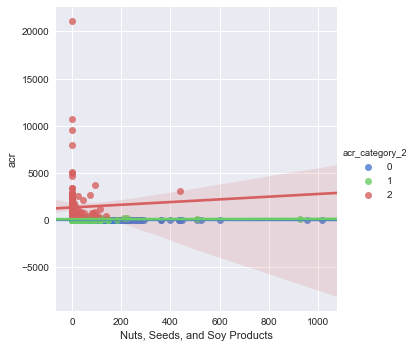

Oils


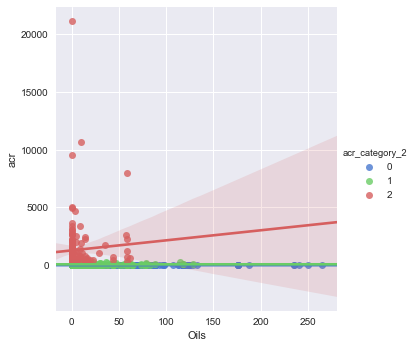

Dried fruits


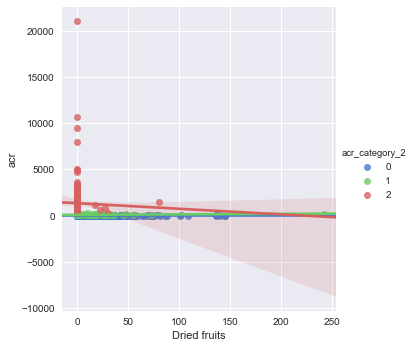

Added Sugars/Sugars and sweets


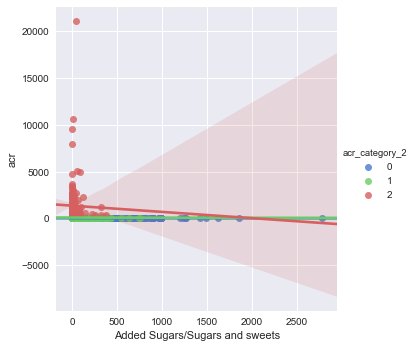

Alcoholic beverages


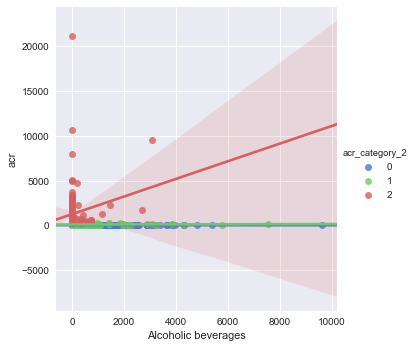

Citrus fruits, juices


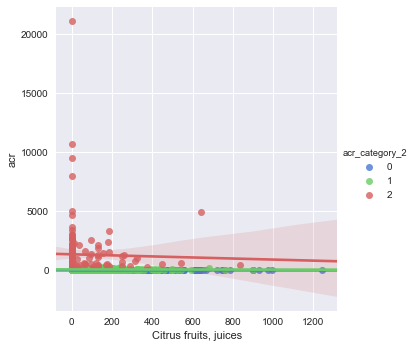

Dark-green vegetables


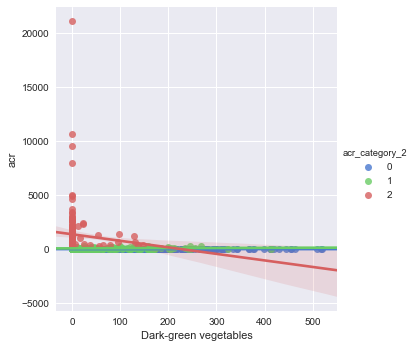

Fruit juices and nectars excluding citrus


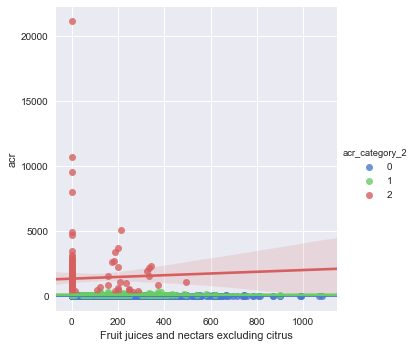

Meat, Poultry and Eggs subgroup


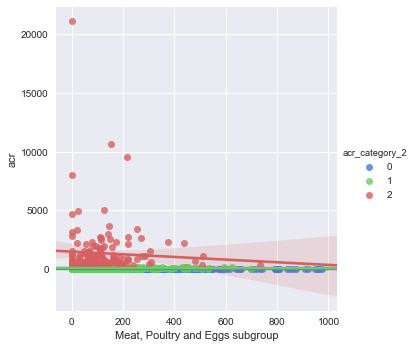

Milk desserts, sauces, gravies


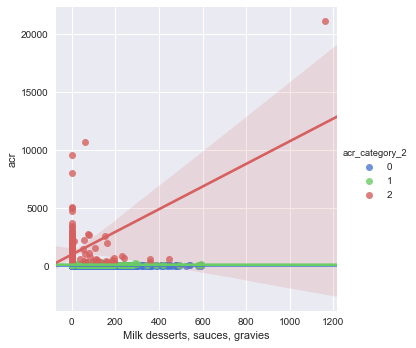

Milks and milk drinks 


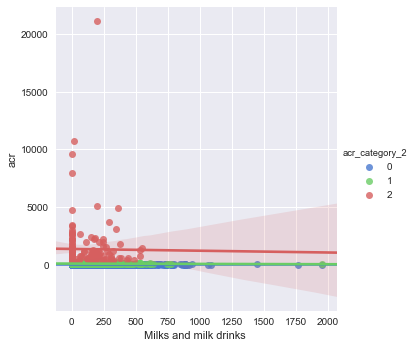

Nonalcoholic beverages


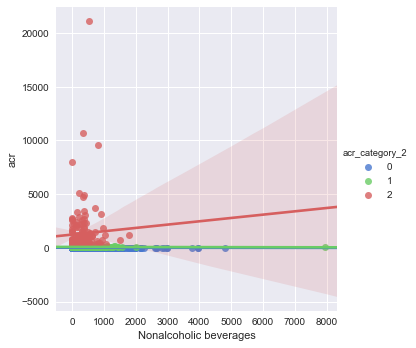

Other fruits


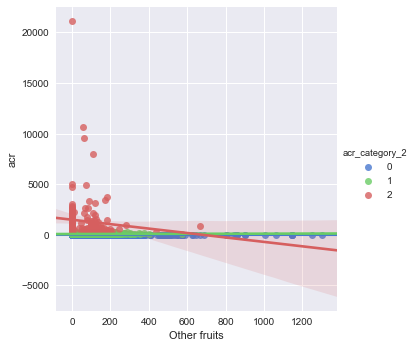

Other vegetables


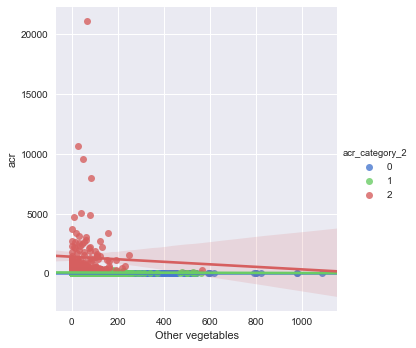

Protein


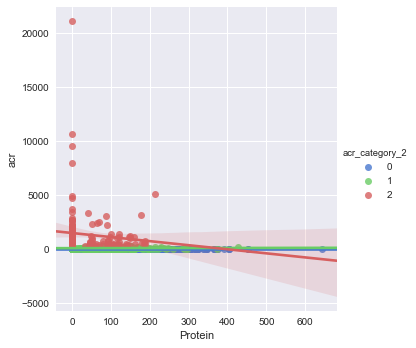

Red and orange vegetables


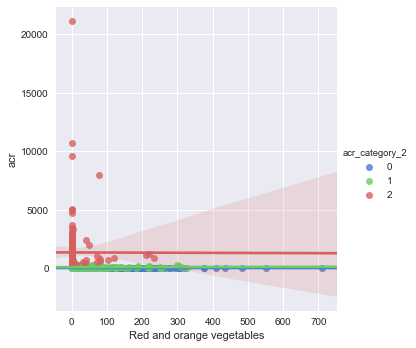

Refined grains


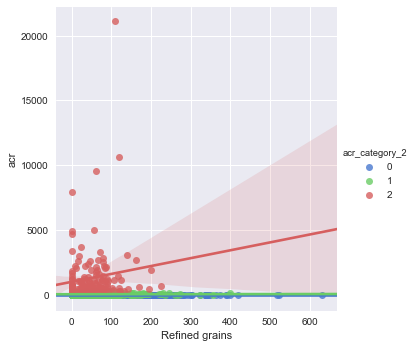

Seafood


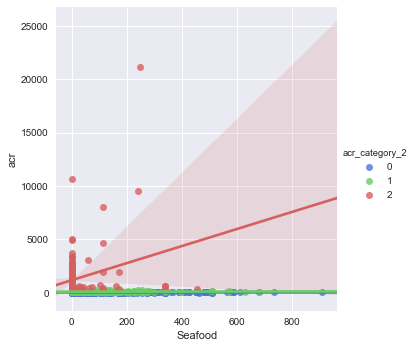

Solid Fats


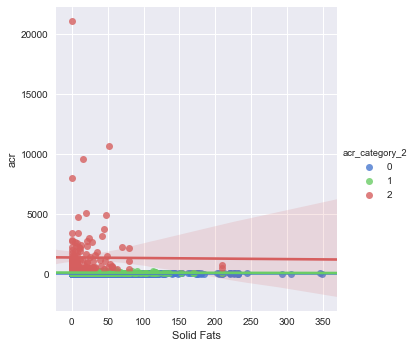

Starchy vegetables


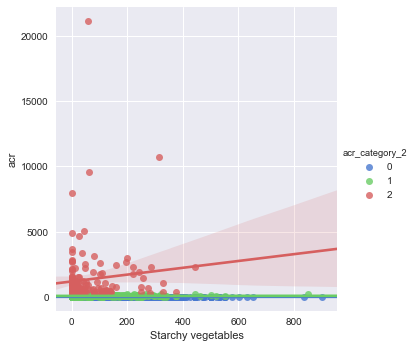

Water, noncarbonated


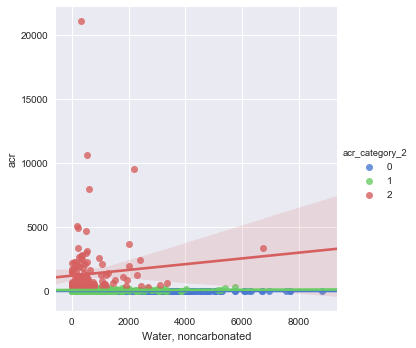

Whole grains


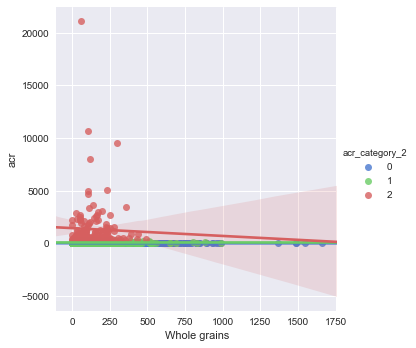

acr


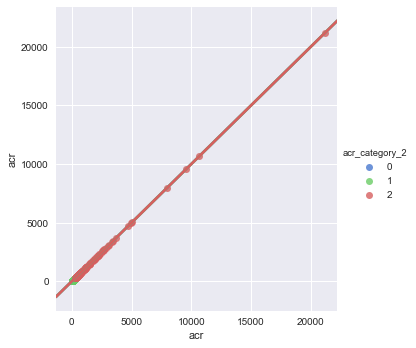

acr_category


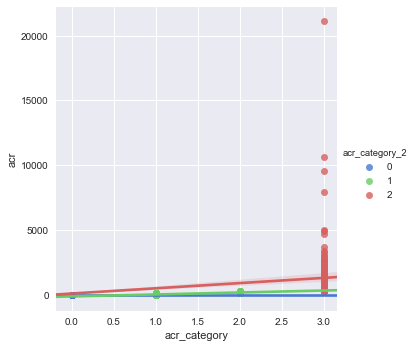

acr_category_2


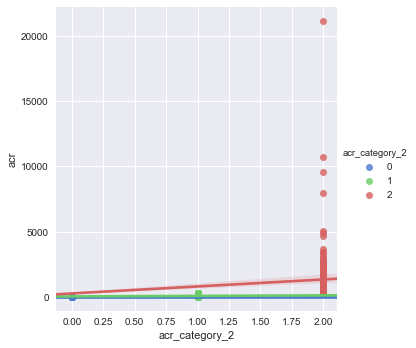

In [34]:
for subgroup in st.columns:
    print(subgroup)
    sns.lmplot(x=subgroup, y="acr", hue="acr_category_2", data=st,  size = 5);
    ax.set_title(subgroup);
    plt.show()

In [35]:
# Not important : Repeating Code
"""
st['acr'] = (st['acr'] - st['acr'].mean())/ (st['acr'].max() - st['acr'].min())

sns.lmplot(x="Alcoholic beverages", y="acr", hue="acr_category", data=st_norm,  size = 5);
ax.set_title('Alcoholic beverages vs not ');
plt.show()


sns.lmplot(x="Water, noncarbonated", y="acr", hue="acr_category", data=st_norm,  size = 7);
ax.set_title('Water, noncarbonated');
plt.show()
"""

'\nst[\'acr\'] = (st[\'acr\'] - st[\'acr\'].mean())/ (st[\'acr\'].max() - st[\'acr\'].min())\n\nsns.lmplot(x="Alcoholic beverages", y="acr", hue="acr_category", data=st_norm,  size = 5);\nax.set_title(\'Alcoholic beverages vs not \');\nplt.show()\n\n\nsns.lmplot(x="Water, noncarbonated", y="acr", hue="acr_category", data=st_norm,  size = 7);\nax.set_title(\'Water, noncarbonated\');\nplt.show()\n'

In [36]:
#st = pd.get_dummies(st)
#st.head(50)

#df=st
#df.head()

In [37]:
st.columns

Index(['Fruits and juices baby food', 'Nuts, Seeds, and Soy Products', 'Oils',
       'Dried fruits', 'Added Sugars/Sugars and sweets', 'Alcoholic beverages',
       'Citrus fruits, juices', 'Dark-green vegetables',
       'Fruit juices and nectars excluding citrus',
       'Meat, Poultry and Eggs subgroup', 'Milk desserts, sauces, gravies',
       'Milks and milk drinks ', 'Nonalcoholic beverages', 'Other fruits',
       'Other vegetables', 'Protein', 'Red and orange vegetables',
       'Refined grains', 'Seafood', 'Solid Fats', 'Starchy vegetables',
       'Water, noncarbonated', 'Whole grains', 'acr', 'acr_category',
       'acr_category_2'],
      dtype='object')

# Apply Machine Learning 

# Linear Regression
# Bayesian
# RandomForest Regression

In [38]:
st.columns

Index(['Fruits and juices baby food', 'Nuts, Seeds, and Soy Products', 'Oils',
       'Dried fruits', 'Added Sugars/Sugars and sweets', 'Alcoholic beverages',
       'Citrus fruits, juices', 'Dark-green vegetables',
       'Fruit juices and nectars excluding citrus',
       'Meat, Poultry and Eggs subgroup', 'Milk desserts, sauces, gravies',
       'Milks and milk drinks ', 'Nonalcoholic beverages', 'Other fruits',
       'Other vegetables', 'Protein', 'Red and orange vegetables',
       'Refined grains', 'Seafood', 'Solid Fats', 'Starchy vegetables',
       'Water, noncarbonated', 'Whole grains', 'acr', 'acr_category',
       'acr_category_2'],
      dtype='object')

In [39]:
# as CKD data is between 10 to 15%, data need to be evenly distributed otherwise bias will be there
# alternatively, Five fold cross validation can be used

In [40]:
# Split data into Train and Test
# Use 10% of dataset as testing data

In [41]:
from sklearn.model_selection import train_test_split

# Using ACR category as the target 
# finding MSE, RMSE, Accuracy error

Have to verify and/or adjust: 
Was this approach correct? i.e using category numbers as the target and using classification ID as target for linear regression. 
The code worked as the category was a number though output probably is not accurate, and adjustments are required on the output side to get correct classification on the regression output.
Or a different approach can be used for classification

Test accuracy was better when using Absolute ACR values as the target


In [80]:
y = st['acr_category']
X = st.drop(columns=['acr_category', 'acr_category_2', 'acr'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42)
len(y_train), len(y_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# create the model
model = LinearRegression().fit(X_train, y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predicted)
test_mse = mean_squared_error(y_test, test_predicted)

print('MSE train data, MSE test data', train_mse, test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(train_mse)),  np.sqrt(np.absolute(test_mse)) )
print('R2 train data, R2 test data', r2_score(y_train, train_predicted), r2_score(y_test, test_predicted))
list(abs(test_predicted) >0.5)

MSE train data, MSE test data 0.296109783867403 0.2601595066313207
RMSE train data, RMSE test data 0.5441597043767602 0.5100583364982095
R2 train data, R2 test data 0.00520775117190686 -0.0024929092497323335


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


# Use ACR as the Target variable

In [44]:
#st['acr'][30:40], df['acr'][30:40]

In [45]:
y = st['acr']
X = st.drop(columns=['acr_category', 'acr_category_2', 'acr'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
len(y_train), len(y_test)

# create the model
model = LinearRegression().fit(X_train, y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predicted)
test_mse = mean_squared_error(y_test, test_predicted)

print('MSE train data, MSE test data', train_mse, test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(train_mse)),  np.sqrt(np.absolute(test_mse)) )
print('R2 train data, R2 test data', r2_score(y_train, train_predicted), r2_score(y_test, test_predicted))

MSE train data, MSE test data 139019.9638530217 36128.194064498384
RMSE train data, RMSE test data 372.8538102970408 190.07418042569165
R2 train data, R2 test data 0.01996165782232895 -0.07724155597516691


# Checking on Normalized data

In [48]:
#st_norm[['acr', 'acr_preserved', 'acr_category', 'acr_category_2']][100:150]

In [49]:
y = st_norm['acr_category']
X = st_norm.drop(columns=['acr_category', 'acr_category_2', 'acr', 'acr_preserved'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
len(y_train), len(y_test)

# create the model
model = LinearRegression().fit(X_train, y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predicted)
test_mse = mean_squared_error(y_test, test_predicted)

print('MSE train data, MSE test data', train_mse, test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(train_mse)),  np.sqrt(np.absolute(test_mse)) )
print('R2 train data, R2 test data', r2_score(y_train, train_predicted), r2_score(y_test, test_predicted))

MSE train data, MSE test data 0.296109783867403 0.26015950663132076
RMSE train data, RMSE test data 0.5441597043767602 0.5100583364982095
R2 train data, R2 test data 0.00520775117190686 -0.0024929092497323335


In [50]:
y = st_norm['acr_preserved']
X = st_norm.drop(columns=['acr_category', 'acr_category_2', 'acr', 'acr_preserved'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
len(y_train), len(y_test)

# create the model
model = LinearRegression().fit(X_train, y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predicted)
test_mse = mean_squared_error(y_test, test_predicted)

print('MSE train data, MSE test data', train_mse, test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(train_mse)),  np.sqrt(np.absolute(test_mse)) )
print('R2 train data, R2 test data', r2_score(y_train, train_predicted), r2_score(y_test, test_predicted))

MSE train data, MSE test data 139019.96385302168 36128.194064498384
RMSE train data, RMSE test data 372.8538102970408 190.07418042569165
R2 train data, R2 test data 0.01996165782232917 -0.07724155597516691


In [ ]:
# use cross validations using Linear Regression

In [56]:
from sklearn.model_selection import cross_val_score

print('Data Not Normalized, Absolute ACR as the target')
y = st['acr']
X = st.drop(columns=['acr_category', 'acr_category_2', 'acr'])
linear_regression_cross_validation_scores = cross_val_score(LinearRegression(), X, y, cv = 10)

print("Accuracy, Standard Deviations (+/- 2) :", linear_regression_cross_validation_scores.mean(), linear_regression_cross_validation_scores.std() * 2) 
print('All Scores', linear_regression_cross_validation_scores)
print('\n\n')

print('Data Not Normalized, ACR Category as the target')
y = st['acr_category']
X = st.drop(columns=['acr_category', 'acr_category_2', 'acr'])
linear_regression_cross_validation_scores = cross_val_score(LinearRegression(), X, y, cv = 10)

print("Accuracy, Standard Deviations (+/- 2) :", linear_regression_cross_validation_scores.mean(), linear_regression_cross_validation_scores.std() * 2) 
print('All Scores', linear_regression_cross_validation_scores)
print('\n\n')

print('Data Normalized, ACR Value as the target')
y = st_norm['acr']
X = st_norm.drop(columns=['acr_category', 'acr_category_2', 'acr', 'acr_preserved'])
linear_regression_cross_validation_scores = cross_val_score(LinearRegression(), X, y, cv = 10)

print("Accuracy, Standard Deviations (+/- 2) :", linear_regression_cross_validation_scores.mean(), linear_regression_cross_validation_scores.std() * 2) 
print('All Scores', linear_regression_cross_validation_scores)
print('\n\n')

print('Data Normalized, ACR Category as the target')
y = st_norm['acr_category_2']
X = st_norm.drop(columns=['acr_category', 'acr_category_2', 'acr', 'acr_preserved'])
linear_regression_cross_validation_scores = cross_val_score(LinearRegression(), X, y, cv = 10)

print("Accuracy, Standard Deviations (+/- 2) :", linear_regression_cross_validation_scores.mean(), linear_regression_cross_validation_scores.std() * 2) 
print('All Scores', linear_regression_cross_validation_scores)
print('\n\n')

Data Not Normalized, Absolute ACR as the target
Accuracy, Standard Deviations (+/- 2) : -0.13437721445344178 0.25229673073844633
All Scores [-0.15300229 -0.43947011 -0.20264393 -0.22392747 -0.00339403 -0.05421361
 -0.01677402 -0.14223043 -0.01766686 -0.09044941]



Data Not Normalized, ACR Category as the target
Accuracy, Standard Deviations (+/- 2) : -0.04059442224670813 0.08170095264378847
All Scores [-0.01559434 -0.00486977 -0.00487111 -0.10204037 -0.0912319  -0.0303665
 -0.02025668 -0.00210333 -0.02404008 -0.11057014]



Data Normalized, ACR Value as the target
Accuracy, Standard Deviations (+/- 2) : -0.13437721445344186 0.25229673073844616
All Scores [-0.15300229 -0.43947011 -0.20264393 -0.22392747 -0.00339403 -0.05421361
 -0.01677402 -0.14223043 -0.01766686 -0.09044941]



Data Normalized, ACR Category as the target
Accuracy, Standard Deviations (+/- 2) : -0.04591572063718643 0.102479799434511
All Scores [-0.00435095 -0.0069745  -0.00443895 -0.1231307  -0.11716895 -0.03110175
 -0

# Apply Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

print('Data Not Normalized, Absolute ACR as the target')
y = st['acr']
X = st.drop(columns=['acr_category', 'acr_category_2', 'acr'])

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.10, random_state=42)

Data Not Normalized, Absolute ACR as the target


In [60]:
poly_regression = LinearRegression().fit(X_train, y_train)

poly_regression_train_pred = pr.predict(X_train)
poly_regression_test_pred = pr.predict(X_test)

poly_regression_train_mse = mean_squared_error(y_train, poly_regression_train_pred)
poly_regression_test_mse = mean_squared_error(y_test, poly_regression_test_pred)


print('MSE train data, MSE test data', poly_regression_train_mse, poly_regression_test_mse)

print('RMSE train data, RMSE test data', np.sqrt(np.absolute(poly_regression_train_mse)),  np.sqrt(np.absolute(poly_regression_train_mse)))
                                                               
print('R2 train data:, R2 test data', r2_score(y_train, poly_regression_train_pred), r2_score(y_test, poly_regression_test_pred))

MSE train data: 9.0965e+04, MSE test data: 52946.42964524904
RMSE train data, RMSE test data 301.6041904259125 301.6041904259125
R2 train data:, R2 test data 0.3587304207428281 -0.5787142349975551


In [64]:
poly_regression_cv = cross_val_score(LinearRegression(), X_poly, y, cv = 10)
print("Accuracy and Standard Deviations (+/- 2) ", poly_regression_cv.mean(), poly_regression_cv.std() * 2)
print ('All Scores', poly_regression_cv)

Accuracy and Standard Deviations (+/- 2)  -0.9565671687384414 1.7140242096401799
All Scores [-0.6452739  -1.72983382 -1.81719604 -2.60063676  0.00676643 -0.53860561
 -0.08080299 -1.58765452 -0.14562894 -0.42680554]


# RandomForestRegressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

print('Data Not Normalized, Absolute ACR as the target')
y = st['acr']
X = st.drop(columns=['acr_category', 'acr_category_2', 'acr'])
X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.10, random_state=42)

random_forest = RandomForestRegressor(n_estimators = 100, bootstrap=True, criterion='mse', max_depth=2).fit(X_train, y_train)

random_forest_train_pred = random_forest.predict(X_train)
random_forest_test_pred = random_forest.predict(X_test)

random_forest_train_mse = mean_squared_error(y_train, random_forest_train_pred)
random_forest_test_mse = mean_squared_error(y_test, random_forest_test_pred)

print('MSE train data, MSE test data', random_forest_train_mse, random_forest_test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(random_forest_train_mse)),  np.sqrt(np.absolute(random_forest_train_mse)))
print('R2 train data, R2 test data', r2_score(y_train, random_forest_train_pred), r2_score(y_test, random_forest_test_pred))

Data Not Normalized, Absolute ACR as the target
MSE train data, MSE test data 78868.81986168536 34104.121116409304
RMSE train data, RMSE test data 280.8359305033552 280.8359305033552
R2 train data, R2 test data 0.4440045492424759 -0.016889369864947934


# RandomForestRegressor with cross validation 
K Fold

In [68]:
random_forest_cv = cross_val_score(RandomForestRegressor(n_estimators = 100, bootstrap=True, criterion='mse', max_depth=2), X_poly, y, cv = 10)
print("Accuracy: Mean and Standard Deviations", random_forest_cv.mean(), random_forest_cv.std() * 2)
print('All scores', random_forest_cv)

Accuracy: Mean and Standard Deviations -0.20875404671503958 0.6018726491821915
All scores [-0.03102919 -0.04342456 -0.98029669 -0.09486602 -0.01371247 -0.1214406
 -0.01479969 -0.55026108 -0.01306195 -0.22464821]


From: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
Ref: Example Parameters:        
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
rfr_cv

# Bayesian

In [72]:
from sklearn.linear_model import BayesianRidge

print('Data Not Normalized, Absolute ACR as the target')
y = st['acr']
X = st.drop(columns=['acr_category', 'acr_category_2', 'acr'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

bayesian = BayesianRidge().fit(X_train, y_train)

bayesian_train_pred = bayesian.predict(X_train)
bayesian_test_pred = bayesian.predict(X_test)

bayesian_train_mse = mean_squared_error(y_train, bayesian_train_pred)
bayesian_test_mse = mean_squared_error(y_test, bayesian_test_pred)

print('MSE train data, MSE test data', bayesian_train_mse, bayesian_test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(bayesian_train_mse)),  np.sqrt(np.absolute(bayesian_train_mse)))
                                                               
print('R2 train data, R2 test data', r2_score(y_train, bayesian_train_pred), r2_score(y_test, bayesian_test_pred))

print('#########################################')

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.10, random_state=42)

bayesian = BayesianRidge().fit(X_train, y_train)

bayesian_train_pred = bayesian.predict(X_train)
bayesian_test_pred = bayesian.predict(X_test)

bayesian_train_mse = mean_squared_error(y_train, bayesian_train_pred)
bayesian_test_mse = mean_squared_error(y_test, bayesian_test_pred)

print('Bayesian on Polynomial fit')
print('MSE train data, MSE test data', bayesian_train_mse, bayesian_test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(bayesian_train_mse)),  np.sqrt(np.absolute(bayesian_train_mse)))
                                                               
print('R2 train data, R2 test data', r2_score(y_train, bayesian_train_pred), r2_score(y_test, bayesian_test_pred))



Data Not Normalized, Absolute ACR as the target
MSE train data, MSE test data 139091.64835314377 35430.366993129515
RMSE train data, RMSE test data 372.94992740734483 372.94992740734483
R2 train data, R2 test data 0.01945630911763696 -0.05643430724247467
#########################################
Bayesian on Polynomial fit
MSE train data, MSE test data 93047.91207329433 47431.67526332861
RMSE train data, RMSE test data 305.0375584633708 305.0375584633708
R2 train data, R2 test data 0.3440472938993433 -0.4142797055385108


# Bayesian with Cross Validation
Polynomial X is used 

In [73]:
bayesian_cv = cross_val_score(BayesianRidge(), X_poly, y, cv = 10)
print("Accuracy and Standard Deviations", bayesian_cv.mean(), bayesian_cv.std() * 2) 
print('All Scores', bayesian_cv)

Accuracy and Standard Deviations -0.6815976514902858 1.2392720066083929
All Scores [-0.40892604 -1.23864887 -1.31940961 -1.9006183  -0.0061049  -0.42478815
 -0.04261281 -1.07061155 -0.10123366 -0.30302261]


# The following can be ignored, Kfold cross validation is already considered above

References

Projects mentioned on: http://sitestree.com/prediction-bayesian-regression-concepts-example-projects/

Insurance HealthCare Costs: https://github.com/techshot25/HealthCare 
Linear and Bayesian modeling in R: Predicting movie popularity
https://towardsdatascience.com/linear-and-bayesian-modelling-in-r-predicting-movie-popularity-6c8ef0a44184 

Bayesian-Stock-Price-Prediction
https://github.com/lschlessinger1/Bayesian-Stock-Price-Prediction 
 
Bayesian Prediction: Well (Oil) Production
https://github.com/jpgrana/bayesian-approach-predicting-well-production  

Binary Classification on Stock Market (S&P 500) using Naive Bayes and Logistic Regression 
https://github.com/NeilPrabhu/Stock-Prediction 

Naive Bayes Weather Prediction
https://github.com/husnainfareed/simple-naive-bayes-weather-prediction/blob/master/bayes.py 

Regression Predict Fuel Efficiency:
https://www.tensorflow.org/tutorials/keras/basic_regression

Regression-Example-Predicting-House-Prices
https://github.com/andersy005/deep-learning/blob/master/keras/04-A-Regression-Example-Predicting-House-Prices.ipynb 

Stock Price Prediction using Regression
https://github.com/chaitjo/regression-stock-prediction 

Concept:
Predicting the Future with Bayes’ Theorem
https://fs.blog/2018/09/bayes-theorem/ 

Chapter 5 - Bayesian Prediction
https://www.sciencedirect.com/science/article/pii/B9780123748546000089  

Books:

Bayesian Methods for Hackers
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers  

Multiple-linear-regression
https://github.com/topics/multiple-linear-regression 

Making Predictions with Regression Analysis
https://statisticsbyjim.com/regression/predictions-regression/  

Regression and Prediction
http://jukebox.esc13.net/untdeveloper/RM/Stats_Module_5/Stats_Module_56.html 
 

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6    